In [1]:
import warnings
warnings.filterwarnings("ignore")


#**GARCH Model for  HONG KONG Stock  Forecasting**
Model is used to forecast the volatility (jump) instead of actual price.

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.3 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
import scipy.stats as stats

#**HONG KONG Stock Exchange Top 10 Stocks Volatillity**

In [6]:
hk_tickers = ['0005.HK', '0001.HK', '0941.HK', '0388.HK', '0700.HK',
              '1299.HK', '0267.HK', '0027.HK', '0083.HK', '0016.HK']

start_date = '1900-01-01'
end_date = '2023-01-01'

# Download data
data = yf.download(hk_tickers, start=start_date, end=end_date)['Adj Close']


[*********************100%***********************]  10 of 10 completed


In [7]:



data.to_csv('hk_stock_data.csv')
print("Data saved to BUX_stock_data.csv")

Data saved to BUX_stock_data.csv


In [8]:
print(data.head())


Ticker                       0001.HK    0005.HK    0016.HK   0027.HK  \
Date                                                                   
2000-01-03 00:00:00+00:00        NaN  46.002678        NaN       NaN   
2000-01-04 00:00:00+00:00  24.671156  45.150772  35.880249  0.550322   
2000-01-05 00:00:00+00:00  22.971870  42.808060  33.530937  0.524116   
2000-01-06 00:00:00+00:00  21.839020  41.317192  31.822365  0.506645   
2000-01-07 00:00:00+00:00  22.279566  42.808060  31.929155  0.524116   

Ticker                      0083.HK    0267.HK  0388.HK  0700.HK    0941.HK  \
Date                                                                          
2000-01-03 00:00:00+00:00       NaN        NaN      NaN      NaN        NaN   
2000-01-04 00:00:00+00:00  1.606577   9.945525      NaN      NaN  21.055315   
2000-01-05 00:00:00+00:00  1.497657  11.800908      NaN      NaN  18.174057   
2000-01-06 00:00:00+00:00  1.488580  11.299457      NaN      NaN  16.884542   
2000-01-07 00:00:00+0

1. 0005.HK (HSBC Holdings)
Sector: Banking & Financial Services
Description: HSBC is one of the world's largest banking and financial services institutions, with a strong presence in Asia. It provides banking, wealth management, and investment services.
2. 0001.HK (CK Hutchison Holdings)
Sector: Conglomerate
Description: CK Hutchison operates in various industries, including ports, retail, infrastructure, and telecommunications. It is one of Hong Kong’s most prominent multinational corporations.
3. 0941.HK (China Mobile)
Sector: Telecommunications
Description: China Mobile is the largest telecom provider in China and Hong Kong, offering mobile services and network infrastructure. It’s a major player in Asia’s telecommunications industry.
4. 0388.HK (Hong Kong Exchanges and Clearing Limited)
Sector: Financial Services
Description: This company operates the Hong Kong Stock Exchange (HKEX), providing a platform for trading equities, bonds, and derivatives.
5. 0700.HK (Tencent Holdings)
Sector: Technology & Media
Description: Tencent is a global leader in internet-based services, gaming, and social media. It owns WeChat and has significant investments in tech and entertainment companies worldwide.
6. 1299.HK (AIA Group)
Sector: Insurance
Description: AIA is a leading insurance and financial services company in Asia, offering life insurance, retirement planning, and wealth management.
7. 0267.HK (CITIC Limited)
Sector: Conglomerate
Description: CITIC operates in finance, energy, manufacturing, and real estate. It is one of China's largest state-owned enterprises with a significant presence in Hong Kong.
8. 0027.HK (Galaxy Entertainment Group)
Sector: Gaming & Hospitality
Description: Galaxy Entertainment is a leading operator of casinos and hotels in Macau, making it a significant player in Asia’s entertainment and tourism industry.
9. 0083.HK (Sino Land Company)
Sector: Real Estate
Description: Sino Land focuses on property development and investment in Hong Kong, Mainland China, and Singapore.
10. 0016.HK (Sun Hung Kai Properties)
Sector: Real Estate
Description: Sun Hung Kai Properties is one of Hong Kong’s largest property developers, specializing in residential, commercial, and retail properties

In [9]:
data.head()

Ticker,0001.HK,0005.HK,0016.HK,0027.HK,0083.HK,0267.HK,0388.HK,0700.HK,0941.HK,1299.HK
Date,,,,,,,,,,
2000-01-03 00:00:00+00:00,NaN,46.002678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00+00:00,24.671156,45.150772,35.880249,0.550322,1.606577,9.945525,NaN,NaN,21.055315,NaN
2000-01-05 00:00:00+00:00,22.971870,42.808060,33.530937,0.524116,1.497657,11.800908,NaN,NaN,18.174057,NaN
2000-01-06 00:00:00+00:00,21.839020,41.317192,31.822365,0.506645,1.488580,11.299457,NaN,NaN,16.884542,NaN
2000-01-07 00:00:00+00:00,22.279566,42.808060,31.929155,0.524116,1.479503,11.065444,NaN,NaN,16.844248,NaN


In [10]:
returns = data.pct_change().dropna()

# Here we create an empty dictionary to store the GARCH model results for each stock
# Set up GARCH modeling for each stock

In [11]:

garch_results = {}
for ticker in hk_tickers:
    model = arch_model(returns[ticker], vol='Garch', p=1, q=1)
    garch_results[ticker] = model.fit(disp='off')
    print(f"GARCH Model fit for {ticker} complete.")

GARCH Model fit for 0005.HK complete.
GARCH Model fit for 0001.HK complete.
GARCH Model fit for 0941.HK complete.
GARCH Model fit for 0388.HK complete.
GARCH Model fit for 0700.HK complete.
GARCH Model fit for 1299.HK complete.
GARCH Model fit for 0267.HK complete.
GARCH Model fit for 0027.HK complete.
GARCH Model fit for 0083.HK complete.
GARCH Model fit for 0016.HK complete.


The Visualization  Part For the HONG KONG Stocks

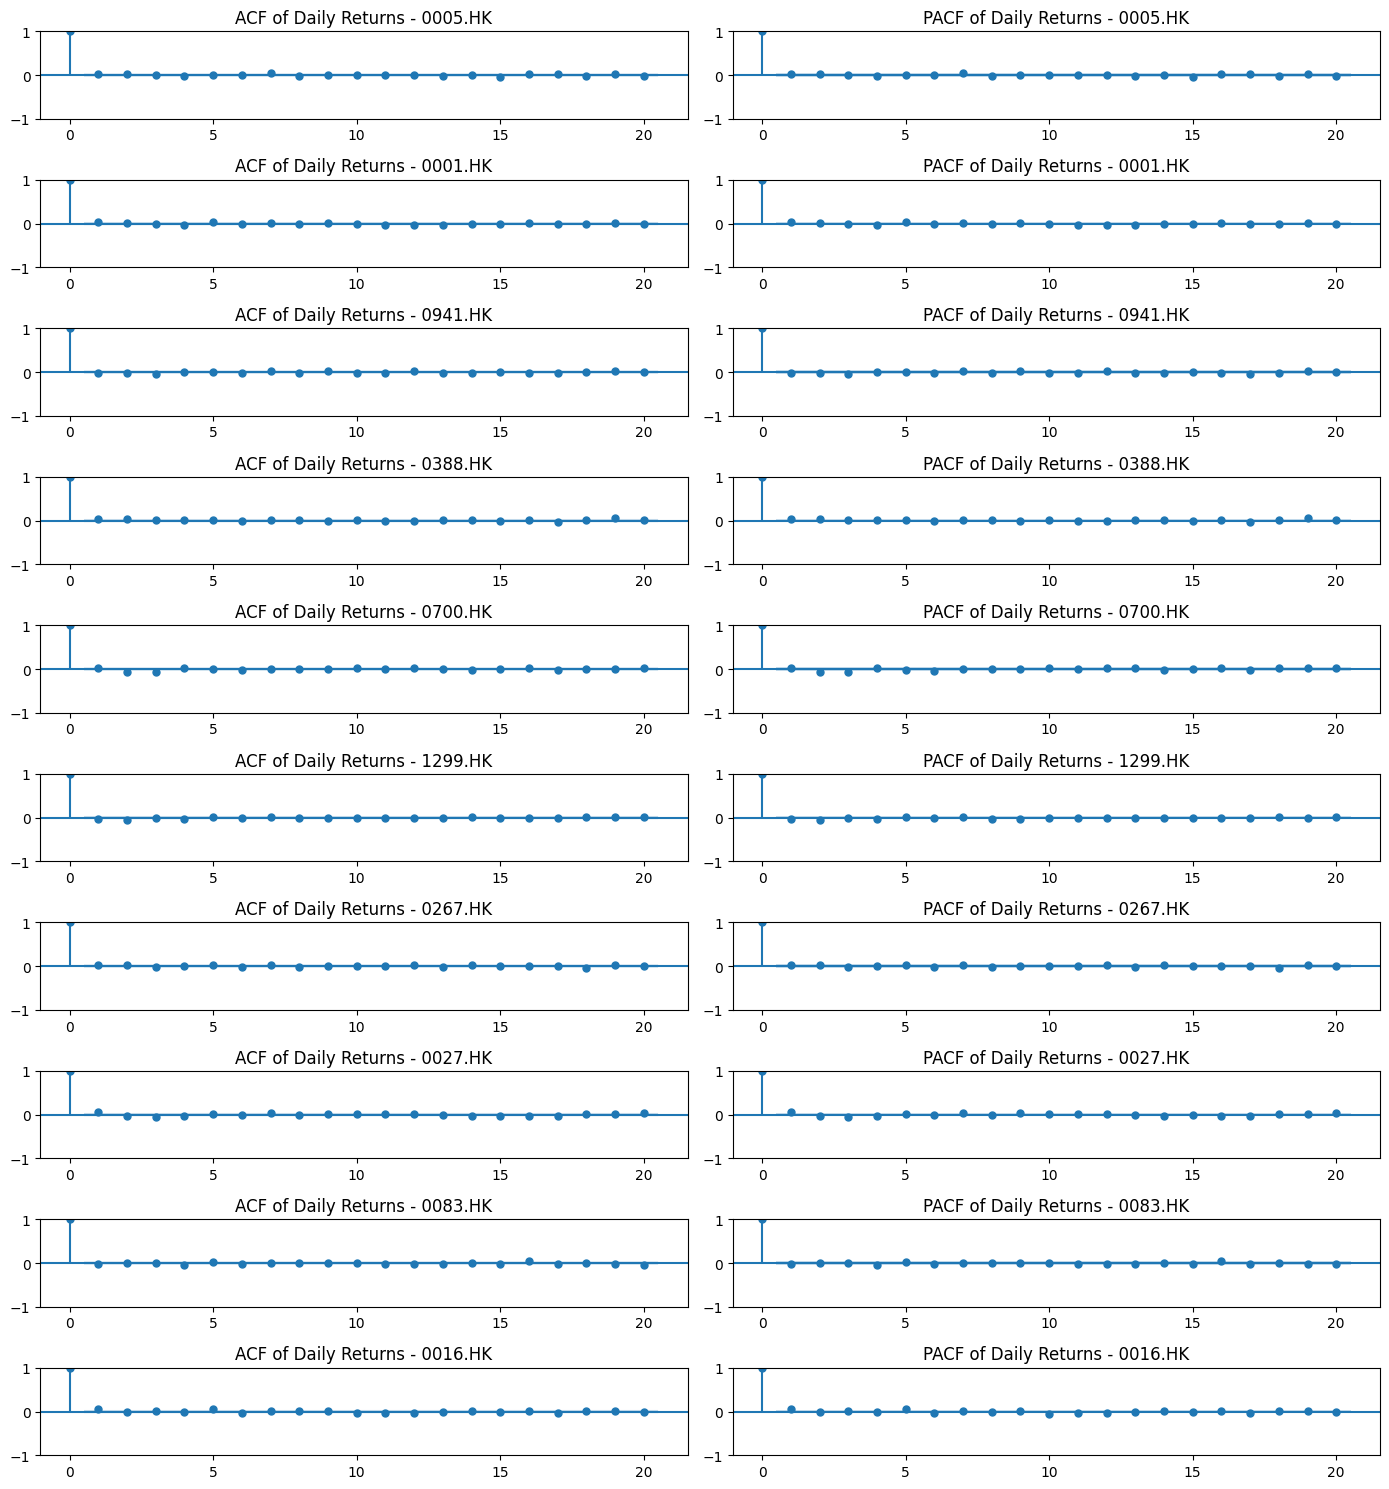

In [12]:
plt.figure(figsize=(14, 15))

for i, ticker in enumerate(hk_tickers):
    # ACF Plot
    plt.subplot(10, 2, 2 * i + 1)
    plot_acf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"ACF of Daily Returns - {ticker}")

    # PACF Plot
    plt.subplot(10, 2, 2 * i + 2)
    plot_pacf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"PACF of Daily Returns - {ticker}")

plt.tight_layout()
plt.show()


The Above we can see the ACF And PACF Plots for the data  which is   provided  via visuallization for all the shares

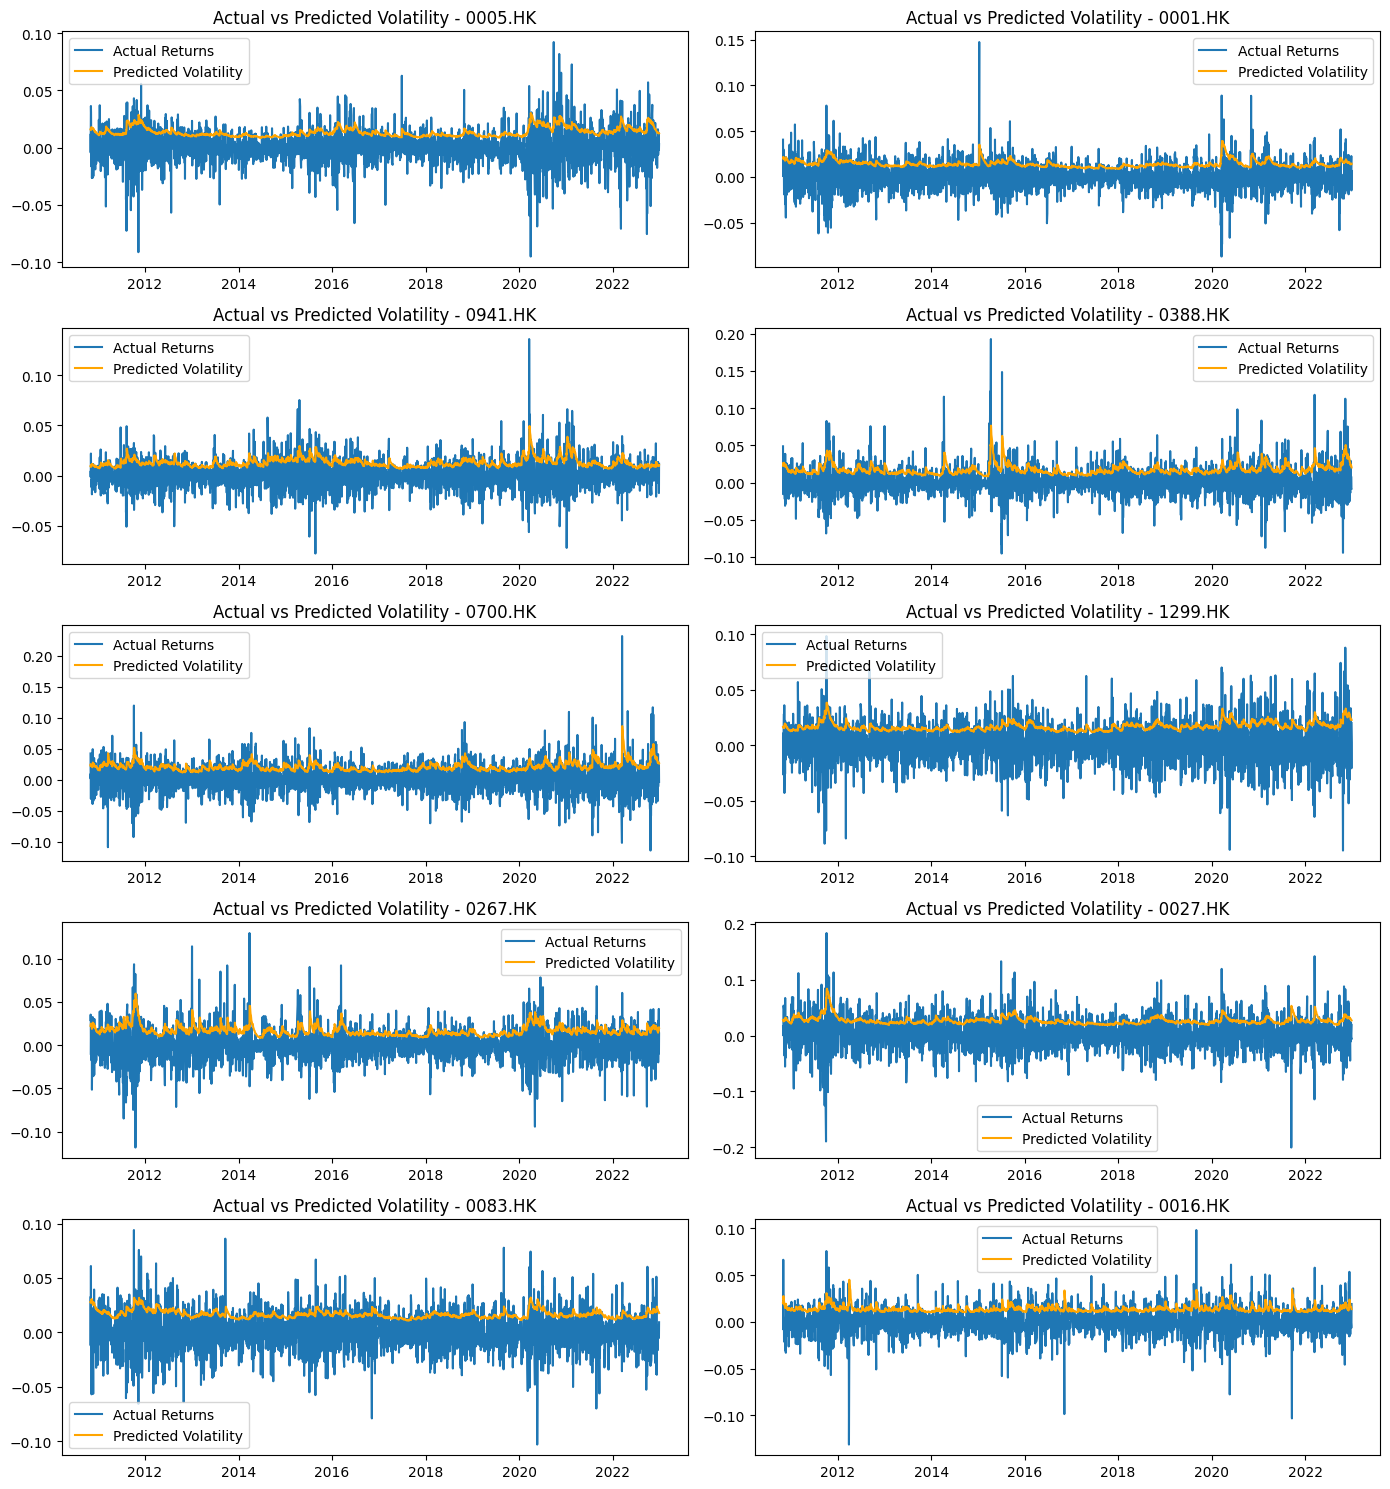

In [13]:
plt.figure(figsize=(14, 15))
for i, ticker in enumerate(hk_tickers):
    plt.subplot(5, 2, i + 1)
    garch_volatility = garch_results[ticker].conditional_volatility
    plt.plot(returns[ticker], label='Actual Returns')
    plt.plot(garch_volatility, color='orange', label='Predicted Volatility')
    plt.title(f'Actual vs Predicted Volatility - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

The Above we  see  the  comparision and relationship between the   the actual and predicted  volatillity of the shares

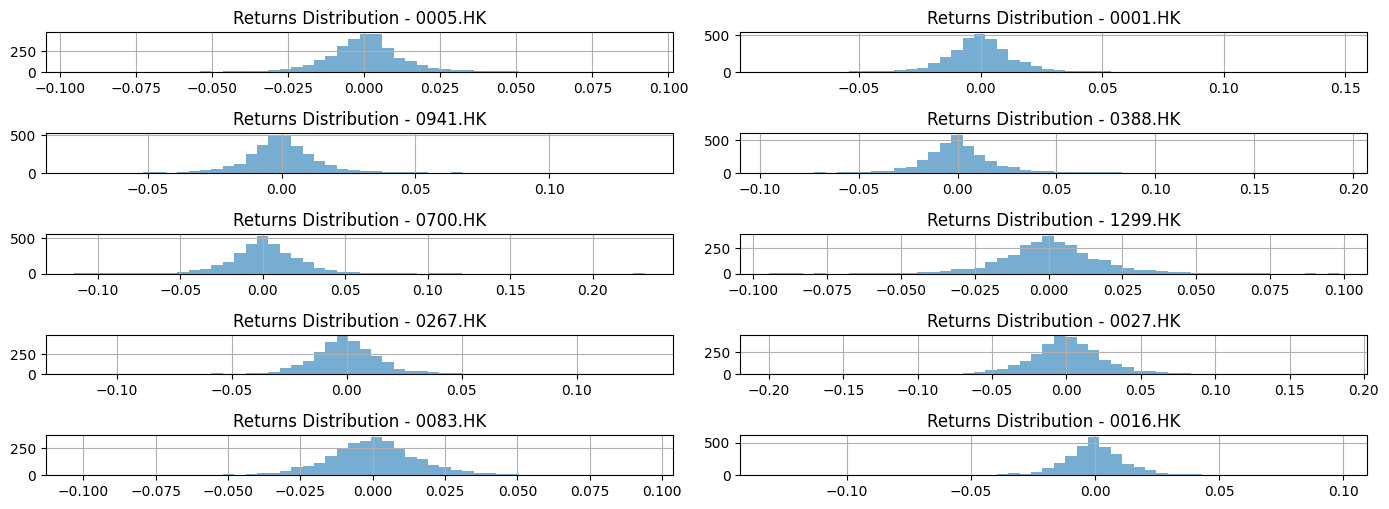

In [14]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(hk_tickers):
    plt.subplot(10, 2, i+1)
    returns[ticker].hist(bins=50, alpha=0.6)
    plt.title(f'Returns Distribution - {ticker}')

plt.tight_layout()
plt.show()

the distribution of the volatillity

In [15]:
print("\nLjung-Box Test Results for GARCH Model Residuals")
for ticker in hk_tickers:
    lb_test = acorr_ljungbox(garch_results[ticker].resid, lags=[10], return_df=True)
    print(f"\n{ticker} Ljung-Box Test:\n{lb_test}")


Ljung-Box Test Results for GARCH Model Residuals

0005.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  12.965363   0.225615

0001.HK Ljung-Box Test:
     lb_stat  lb_pvalue
10  9.637871   0.472817

0941.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  12.915271   0.228448

0388.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  11.702993   0.305426

0700.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  37.002301   0.000057

1299.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  19.442716   0.034987

0267.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  10.062741   0.435006

0027.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  30.153485   0.000808

0083.HK Ljung-Box Test:
      lb_stat  lb_pvalue
10  11.496023     0.3202

0016.HK Ljung-Box Test:
     lb_stat  lb_pvalue
10  27.43352   0.002223


The above provides the  Ljung  Box test for each of the available tickers present and use for the operations

In [16]:
print("\nSkewness and Kurtosis for Returns and Residuals")
for ticker in hk_tickers:
    returns_skewness = stats.skew(returns[ticker])
    returns_kurtosis = stats.kurtosis(returns[ticker])
    residuals_skewness = stats.skew(garch_results[ticker].resid)
    residuals_kurtosis = stats.kurtosis(garch_results[ticker].resid)
    print(f"\n{ticker} - Returns: Skewness={returns_skewness:.2f}, Kurtosis={returns_kurtosis:.2f}")
    print(f"{ticker} - Residuals: Skewness={residuals_skewness:.2f}, Kurtosis={residuals_kurtosis:.2f}")


Skewness and Kurtosis for Returns and Residuals

0005.HK - Returns: Skewness=-0.13, Kurtosis=4.92
0005.HK - Residuals: Skewness=-0.13, Kurtosis=4.92

0001.HK - Returns: Skewness=0.48, Kurtosis=6.53
0001.HK - Residuals: Skewness=0.48, Kurtosis=6.53

0941.HK - Returns: Skewness=0.59, Kurtosis=5.68
0941.HK - Residuals: Skewness=0.59, Kurtosis=5.68

0388.HK - Returns: Skewness=1.09, Kurtosis=9.13
0388.HK - Residuals: Skewness=1.09, Kurtosis=9.13

0700.HK - Returns: Skewness=0.51, Kurtosis=6.50
0700.HK - Residuals: Skewness=0.51, Kurtosis=6.50

1299.HK - Returns: Skewness=0.07, Kurtosis=2.73
1299.HK - Residuals: Skewness=0.07, Kurtosis=2.73

0267.HK - Returns: Skewness=0.39, Kurtosis=4.97
0267.HK - Residuals: Skewness=0.39, Kurtosis=4.97

0027.HK - Returns: Skewness=0.20, Kurtosis=4.48
0027.HK - Residuals: Skewness=0.20, Kurtosis=4.48

0083.HK - Returns: Skewness=0.07, Kurtosis=2.26
0083.HK - Residuals: Skewness=0.07, Kurtosis=2.26

0016.HK - Returns: Skewness=-0.22, Kurtosis=6.97
0016.HK 

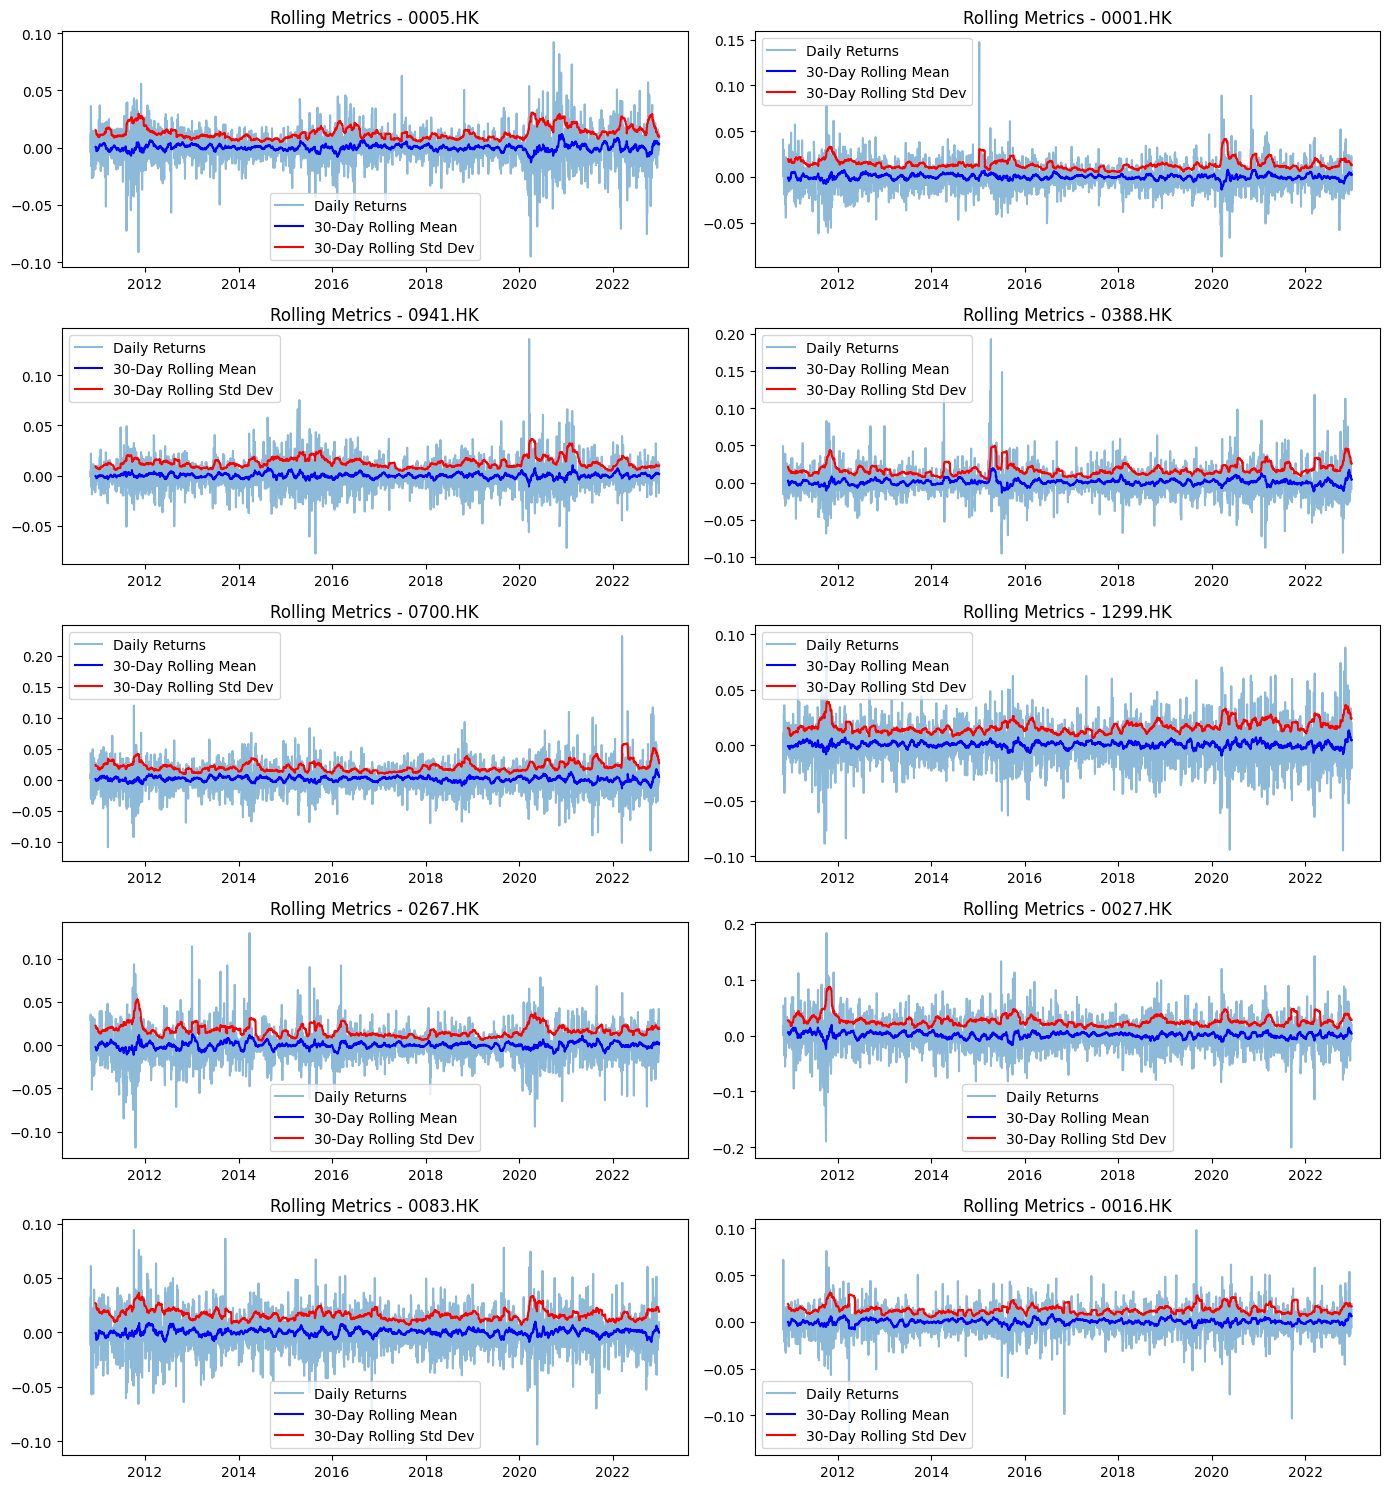

In [18]:
plt.figure(figsize=(14, 15))
for i, ticker in enumerate(hk_tickers):
    plt.subplot(5, 2, i + 1)
    rolling_mean = returns[ticker].rolling(window=30).mean()
    rolling_std = returns[ticker].rolling(window=30).std()
    plt.plot(returns[ticker], label='Daily Returns', alpha=0.5)
    plt.plot(rolling_mean, label='30-Day Rolling Mean', color='blue')
    plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='red')
    plt.title(f'Rolling Metrics - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

we get a  rough idea of  rolling mean and  std dev  from the above for each shares

In [19]:
for ticker in hk_tickers:
    print(f"\n=== Actual and Predicted Volatility for {ticker} ===")
    actual_returns = returns[ticker]
    predicted_volatility = garch_results[ticker].conditional_volatility
    combined_df = pd.DataFrame({
        'Actual Returns': actual_returns,
        'Predicted Volatility': predicted_volatility
    })
    print(combined_df)


=== Actual and Predicted Volatility for 0005.HK ===
                           Actual Returns  Predicted Volatility
Date                                                           
2010-11-01 00:00:00+00:00        0.011173              0.015919
2010-11-02 00:00:00+00:00       -0.004298              0.015674
2010-11-03 00:00:00+00:00        0.017263              0.015279
2010-11-04 00:00:00+00:00        0.036364              0.015350
2010-11-05 00:00:00+00:00        0.030994              0.016985
...                                   ...                   ...
2022-12-22 00:00:00+00:00        0.014737              0.012917
2022-12-23 00:00:00+00:00       -0.006224              0.013027
2022-12-28 00:00:00+00:00        0.012526              0.012801
2022-12-29 00:00:00+00:00       -0.002062              0.012804
2022-12-30 00:00:00+00:00        0.003099              0.012518

[3002 rows x 2 columns]

=== Actual and Predicted Volatility for 0001.HK ===
                           Actual Ret

**Conclusion:**

we  have applied the   garch model  over the  huge amount of HONG KONG shares data and thus  used many tests and  visualizations to get the  efficeint  results